In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 10
n_files = 20
base_dir = "toy_eg_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [4]:
coverage_df

,0.5,1,2,4,Tree val,Naive
0,1.000000,1.000000,1.000000,0.857143,0.750000,0.000000
1,1.000000,0.833333,1.000000,0.666667,1.000000,0.400000
2,1.000000,1.000000,1.000000,0.857143,0.800000,0.200000
3,0.285714,0.571429,0.857143,0.857143,0.857143,0.142857
4,1.000000,1.000000,0.875000,1.000000,1.000000,0.142857
...,...,...,...,...,...,...
5,1.000000,1.000000,1.000000,1.000000,0.833333,0.166667
6,1.000000,1.000000,1.000000,1.000000,0.800000,0.200000
7,1.000000,1.000000,0.875000,0.875000,1.000000,0.400000
8,1.000000,1.000000,0.875000,0.875000,1.000000,0.250000


In [5]:
length_df

,0.5,1,2,4,Tree val,Naive
0,61.024312,36.160207,22.971480,18.169740,51.570615,2.106867
1,52.682725,43.171071,23.125870,14.344654,40.605556,2.169541
2,53.556695,40.282080,32.297489,19.849830,183.115094,2.065204
3,44.986263,43.618029,21.946458,12.286883,189.647296,2.346973
4,49.843556,44.748685,23.210805,19.240751,27.572515,2.417013
...,...,...,...,...,...,...
5,64.667579,51.190472,22.104463,10.451962,21.174997,2.365816
6,90.648598,53.277327,147.104590,20.658706,83.855566,2.490735
7,51.859323,44.232505,20.922916,11.111350,70.653969,2.039213
8,71.611761,34.122250,19.956204,13.701726,31.465689,2.395523


In [6]:
MSE_df

,0.5,1,2,4,Tree val,Naive
0,26.156483,25.847721,25.839116,25.662096,24.713393,24.713393
1,26.790370,26.915270,26.060825,26.480287,26.054186,26.054186
2,30.433407,32.130360,32.988014,32.221999,29.082781,29.082781
3,30.057186,30.057186,32.608694,29.787344,30.563965,30.563965
4,25.812693,25.812693,27.581793,26.036984,25.515342,25.515342
...,...,...,...,...,...,...
5,26.319227,27.036126,27.798058,26.262245,26.237533,26.237533
6,30.596239,30.596239,31.058645,30.473299,30.529022,30.529022
7,31.219389,31.219389,29.241714,29.252194,29.413962,29.413962
8,31.726791,30.407912,31.726791,32.694166,31.951680,31.951680


In [13]:
def boxplots(dfs, metrics):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        sns.boxplot(data=df, ax=axes[i])
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            axes[i].plot(j, mean, marker='^', color='red', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
        elif metric == "Length":
            axes[i].set_ylim(0,500)
        elif metric == "MSE":
            axes[i].set_ylim(0,50)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

Coverage :
 0.5         0.969583
1           0.945565
2           0.924018
4           0.887262
Tree val    0.898911
Naive       0.216732
dtype: float64
Length :
 0.5          68.333020
1            46.167085
2            28.940034
4            16.576582
Tree val    106.957976
Naive         2.314368
dtype: float64
MSE :
 0.5         30.365004
1           30.363258
2           30.266891
4           30.071917
Tree val    29.613064
Naive       29.613064
dtype: float64


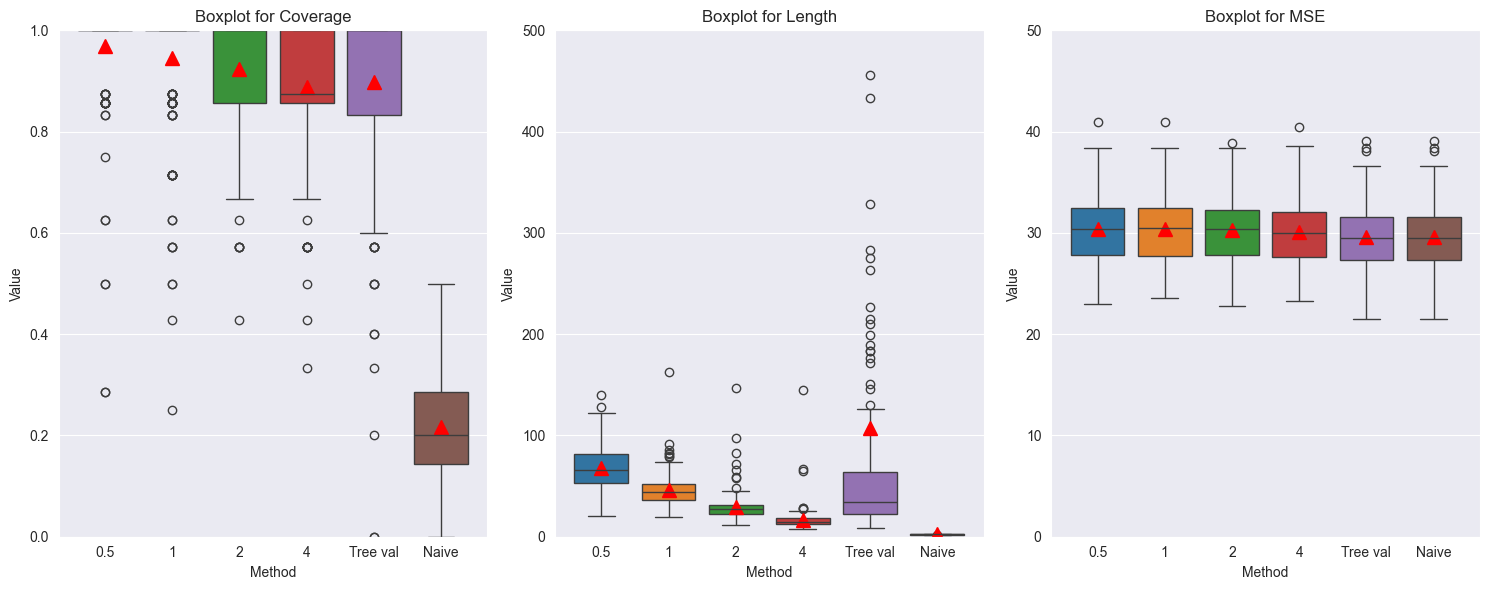

In [14]:
boxplots(dfs=[coverage_df, length_df, MSE_df], metrics=["Coverage", "Length", "MSE"])